# my dataset

In [ ]:
!git clone https://github.com/ngcthc/CS114-ML-Public.git

Cloning into 'CS114-ML-Public'...
remote: Enumerating objects: 386, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 386 (delta 51), reused 88 (delta 34), pack-reused 256
Receiving objects: 100% (386/386), 5.21 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (186/186), done.


# scikitlearn code

In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

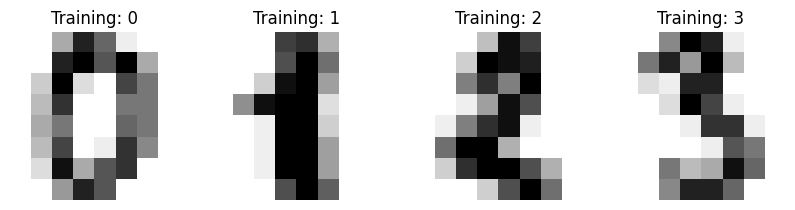

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


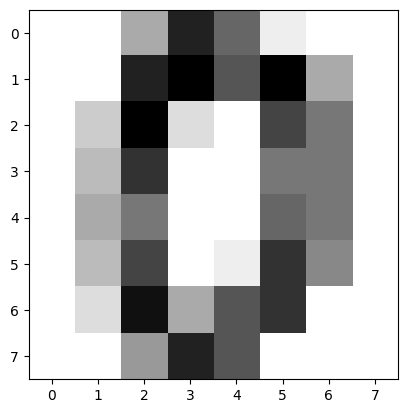

In [ ]:
print(digits.images[0])
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

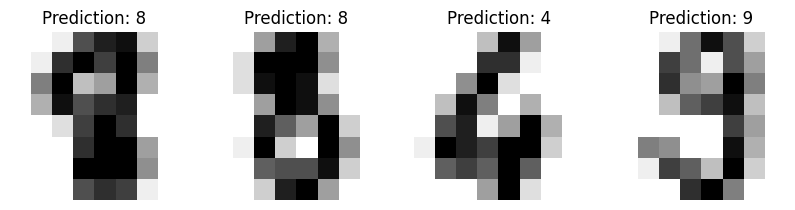

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


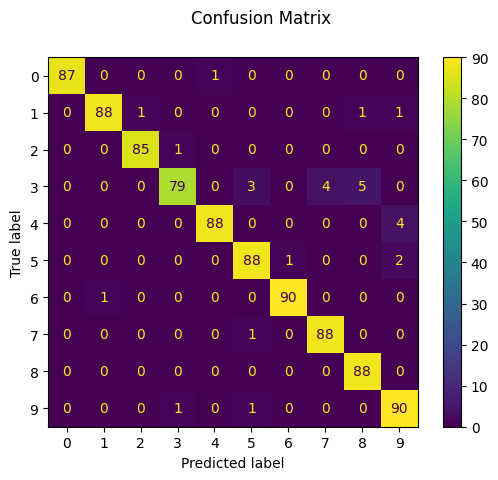

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# predict on my dataset

## test on 1 image

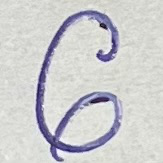

In [ ]:
from PIL import Image
import numpy as np
im_path = "/content/CS114-ML-Public/datasetfull/6/6_0.jpg"
# im1 = np.asarray(Image.open(im_path).convert("1"),dtype = float)
img = Image.open(im_path)
img.show()
im2 = np.asarray(img.convert("L").resize((8,8)), dtype = float)//2**4

[[3. 3. 3. 5. 5. 4. 3. 3.]
 [3. 3. 4. 5. 4. 6. 3. 3.]
 [3. 3. 5. 3. 3. 6. 3. 3.]
 [3. 4. 5. 3. 3. 3. 3. 3.]
 [3. 5. 4. 3. 5. 5. 3. 3.]
 [3. 5. 4. 5. 4. 4. 3. 3.]
 [3. 3. 7. 4. 3. 5. 3. 3.]
 [3. 2. 6. 6. 5. 3. 3. 3.]]


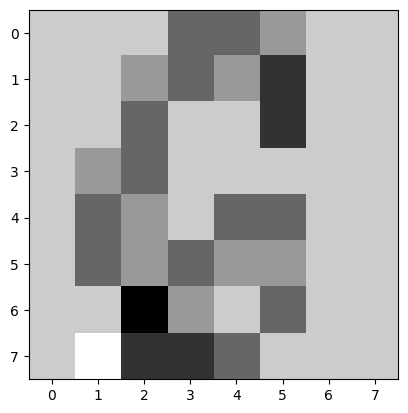

In [ ]:
im = 16-im2
print(im)
plt.imshow(im,cmap=plt.cm.gray_r, interpolation="nearest")

In [ ]:
im.reshape((1,-1))

array([[1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 3., 6., 1., 1., 1., 1.,
        1., 1., 1., 8., 3., 1., 1., 1., 1., 1., 1., 6., 2., 5., 1., 1.,
        1., 1., 1., 1., 1., 5., 1., 1., 1., 1., 2., 1., 1., 6., 1., 1.,
        1., 1., 2., 2., 2., 5., 1., 1., 1., 1., 1., 5., 4., 1., 1., 1.]])

In [ ]:
clf.predict(im.reshape((1,-1)))

array([8])

## predict on whole dataset

In [ ]:
from pathlib import Path
from PIL import Image
import numpy as np

imgs = []
labels = []
Dataset_dir = Path("/content/CS114-ML-Public/dataset")

for digit in Dataset_dir.iterdir():
  if digit.is_dir():
    for image in digit.iterdir():
      im_arr = np.asarray(Image.open(image).resize((8,8)).convert("L"), dtype = float)
      imgs.append(im_arr)

      labels.append(int(str(digit)[-1]))
print (f"total: {len(imgs)}")

total: 90


In [ ]:
# preprocessing
for idx,each in enumerate(imgs):
  imgs[idx] = 2**4 - (each / 2**4)

imgs = np.asarray(imgs)

In [ ]:
my_prediction = clf.predict(imgs.reshape(len(imgs),-1))

In [ ]:
my_prediction

array([0, 9, 4, 9, 9, 9, 3, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9,
       9, 9, 9, 9, 3, 8, 9, 8, 1, 9, 1, 8, 8, 9, 2, 4, 9, 9, 7, 2, 2, 7,
       8, 5, 5, 3, 5, 8, 3, 3, 5, 3, 8, 8, 8, 9, 9, 9, 9, 9, 4, 8, 8, 8,
       8, 8, 9, 9, 8, 9, 7, 7, 7, 7, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [ ]:
np.asarray(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

confusion matrix

Confusion matrix:
[[1 0 0 1 2 1 0 0 0 4]
 [0 2 0 0 0 0 0 0 4 3]
 [0 0 3 0 1 0 0 2 1 2]
 [0 0 0 0 0 0 0 0 0 9]
 [0 0 0 0 1 0 0 0 3 5]
 [0 0 0 0 0 9 0 0 0 0]
 [0 0 0 4 0 4 0 0 1 0]
 [0 0 0 0 0 0 0 5 0 4]
 [0 0 0 0 0 0 0 0 6 3]
 [0 0 0 1 0 0 0 0 0 8]]


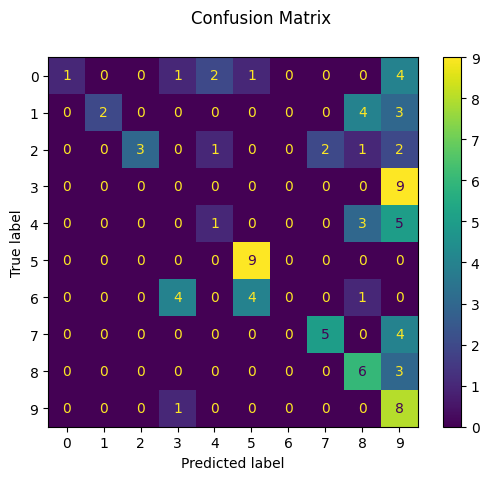

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(np.asarray(labels), my_prediction)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[2 0 0 1 2 1 0 0 0 3]
 [0 2 0 0 0 0 0 0 4 3]
 [0 0 2 0 1 0 0 2 2 2]
 [0 0 0 1 0 0 0 0 0 8]
 [0 0 0 0 1 0 0 0 3 5]
 [0 0 0 1 0 6 0 0 1 1]
 [0 0 0 4 0 4 0 0 1 0]
 [0 0 0 0 0 0 0 5 0 4]
 [0 0 0 0 0 0 0 0 6 3]
 [0 0 0 1 0 0 0 0 0 8]]


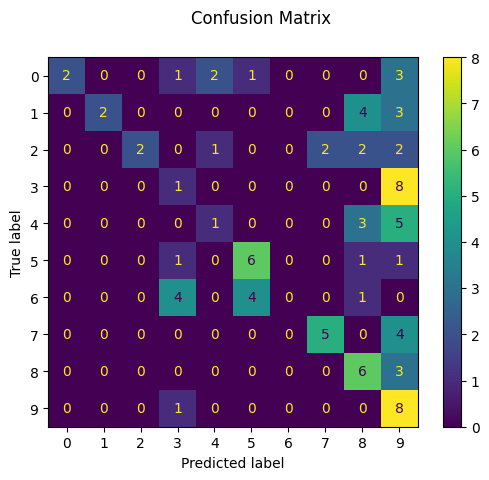

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(np.asarray(labels), my_prediction)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
imgs[19]

array([[0.5   , 0.4375, 0.5   , 0.4375, 1.0625, 3.0625, 2.4375, 2.3125],
       [0.5   , 0.4375, 0.4375, 0.375 , 2.6875, 0.875 , 1.0625, 5.625 ],
       [0.5625, 0.5   , 0.375 , 0.5   , 3.125 , 0.5   , 1.9375, 4.3125],
       [0.5   , 0.4375, 0.4375, 0.25  , 1.6875, 2.5625, 3.75  , 2.    ],
       [0.375 , 0.4375, 0.375 , 0.375 , 0.3125, 0.3125, 2.4375, 1.25  ],
       [1.1875, 0.375 , 0.3125, 0.375 , 0.375 , 0.25  , 2.875 , 1.125 ],
       [2.1875, 2.3125, 1.0625, 0.625 , 0.625 , 0.75  , 3.375 , 0.8125],
       [0.375 , 1.125 , 2.0625, 2.4375, 2.5625, 2.6875, 1.6875, 0.4375]])